In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Import Data

In [129]:
data = pd.read_csv('features_data.csv', delimiter=',', decimal='.')

In [130]:
time = data['time']
time_1 = data['time_1']
time_2 = data['time_2']
time_3 = data['time_3']
jerk = data['mean_jerk_vector']
jerk_1 = data['mean_jerk_1_vector']
jerk_2 = data['mean_jerk_2_vector']
jerk_3 = data['mean_jerk_3_vector']
jerk_y = data['mean_jerk_y']
jerk_y_1 = data['mean_jerk_1_y']
jerk_y_2 = data['mean_jerk_2_y']
jerk_y_3 = data['mean_jerk_3_y']
peaks = data['pos_peaks']
peaks_1 = data['pos_peaks_1']
peaks_2 = data['pos_peaks_2']
peaks_3 = data['pos_peaks_3']
gender = data['gender']

# Time and Jerk Vector

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0]


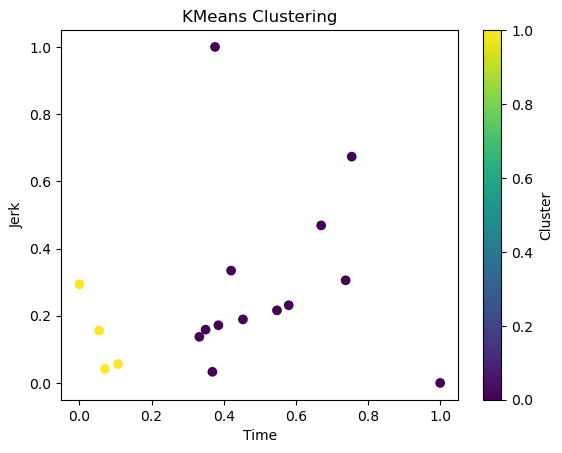

In [139]:
def plotKMeans(data, cluster):
    kmeans = KMeans(n_clusters=cluster, random_state=0, n_init='auto').fit(data)
    print(kmeans.labels_)

    plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.xlabel('Time')
    plt.ylabel('Jerk')
    plt.title('KMeans Clustering')
    plt.colorbar(label='Cluster')
    plt.show()

data = np.array([[t, j] for t, j in zip(time, jerk)])
data_1 = np.array([[t, j] for t, j in zip(time_1, jerk_1)])
data_2 = np.array([[t, j] for t, j in zip(time_2, jerk_3)])
data_3 = np.array([[t, j] for t, j in zip(time_3, jerk_3)])

plotKMeans(data, 2)

Calculate gender based climbers per cluster and plot the clusters with the gender information

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: 7 females, 6 males
Cluster 1: 2 females, 2 males


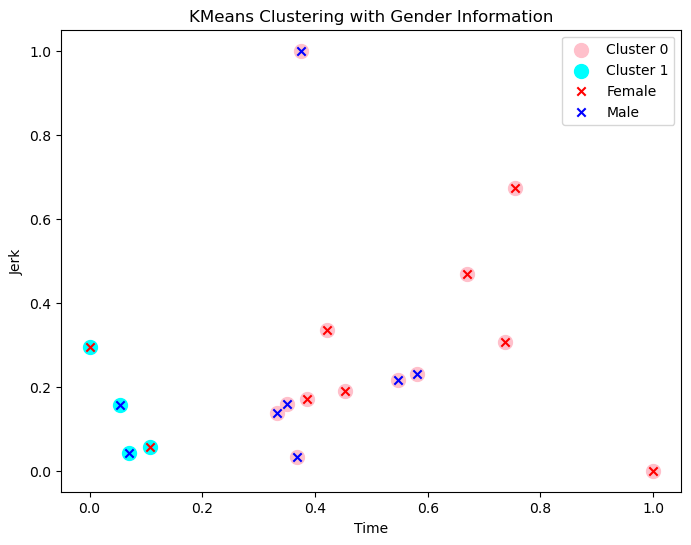

In [140]:
def plotGender2Clusters(data, xlabel, ylabel):   
    kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(data)
    # Gender based counting per cluster
    female_counts = {}
    male_counts = {}

    # Iterate over each cluster
    for cluster_label in range(2):
        cluster_data = data[kmeans.labels_ == cluster_label]
        
        female_counts[cluster_label] = np.sum((gender == 'female') & (kmeans.labels_ == cluster_label))
        male_counts[cluster_label] = np.sum((gender == 'male') & (kmeans.labels_ == cluster_label))

    # Print
    for cluster_label in range(2):
        print(f"Cluster {cluster_label}: {female_counts[cluster_label]} females, {male_counts[cluster_label]} males")

    # Plot
    colors = ['pink', 'cyan']
    plt.figure(figsize=(8, 6))
    for cluster_label in range(2):
        cluster_data = data[kmeans.labels_ == cluster_label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster_label], marker='o', s=100, label=f'Cluster {cluster_label}')

    # Plot females as red crosses
    plt.scatter(data[(gender == 'female'), 0], data[(gender == 'female'), 1], c='red', marker='x', label='Female')

    # Plot males blue crosses
    plt.scatter(data[(gender == 'male'), 0], data[(gender == 'male'), 1], c='blue', marker='x', label='Male')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('KMeans Clustering with Gender Information')
    plt.legend()
    plt.show()

plotGender2Clusters(data, 'Time', 'Jerk')

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


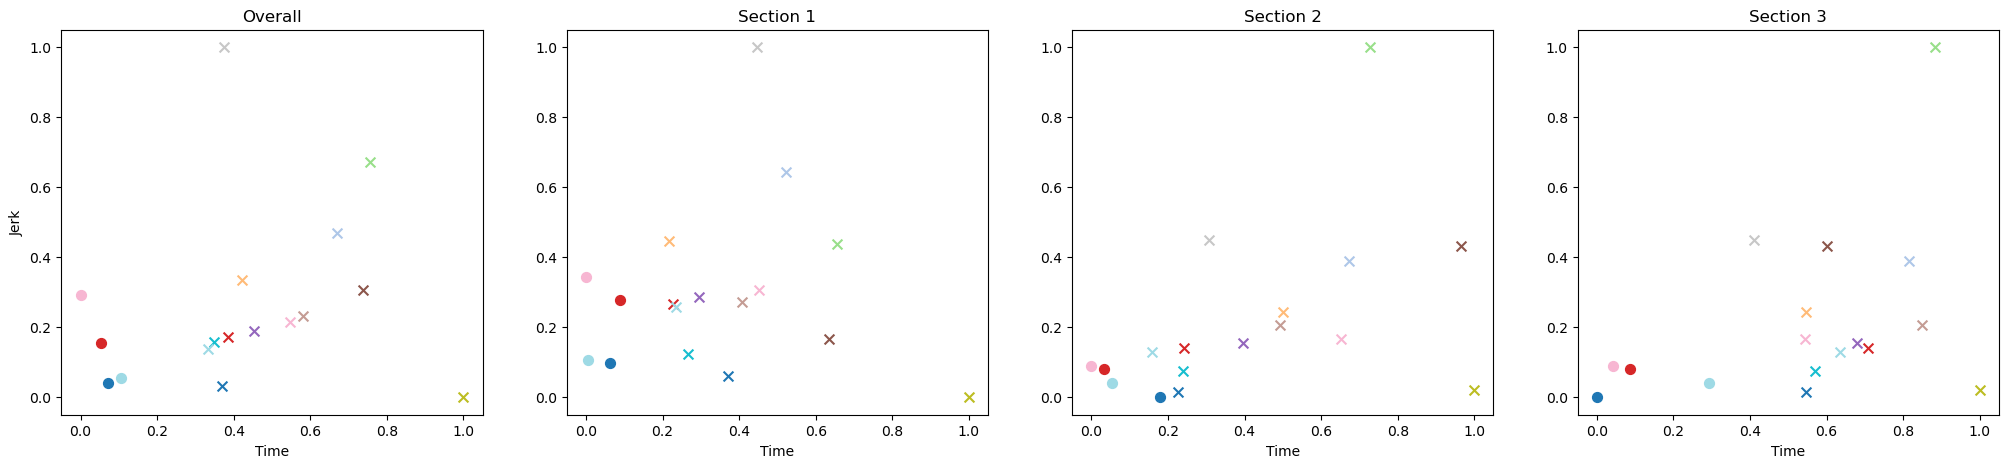

In [143]:
def plotSections2Cluster(overall, section_1, section_2, section_3, xlabel, ylabel):
    kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(overall)
    fig, axs = plt.subplots(1, 4, figsize=(25, 5))

    datasets = [overall, section_1, section_2, section_3]

    for j, dataset in enumerate(datasets):
        for cluster_label in range(2):
            markers = ['x', 'o']
            cluster_data = dataset[kmeans.labels_ == cluster_label]
            num_points = len(cluster_data)
            unique_colors = plt.cm.tab20(np.linspace(0, 1, num_points))  # Generate unique colors
            for i, point in enumerate(cluster_data):
                axs[j].scatter(point[0], point[1], marker=markers[cluster_label], color=unique_colors[i], s=50)
                axs[j].set_xlabel(xlabel)
                
    axs[0].set_ylabel(ylabel)
    axs[0].set_title('Overall')  
    axs[1].set_title('Section 1') 
    axs[2].set_title('Section 2') 
    axs[3].set_title('Section 3')          
    plt.show()

plotSections2Cluster(data, data_1, data_2, data_3, 'Time', 'Jerk')

# Time and Jerk Y

In [131]:
time_jerk_y_data = np.array([[t, j] for t, j in zip(time, jerk_y)])
time_jerk_y_data_1 = np.array([[t, j] for t, j in zip(time_1, jerk_y_1)])
time_jerk_y_data_2 = np.array([[t, j] for t, j in zip(time_2, jerk_y_2)])
time_jerk_y_data_3 = np.array([[t, j] for t, j in zip(time_3, jerk_y_3)])

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: 7 females, 2 males
Cluster 1: 2 females, 6 males


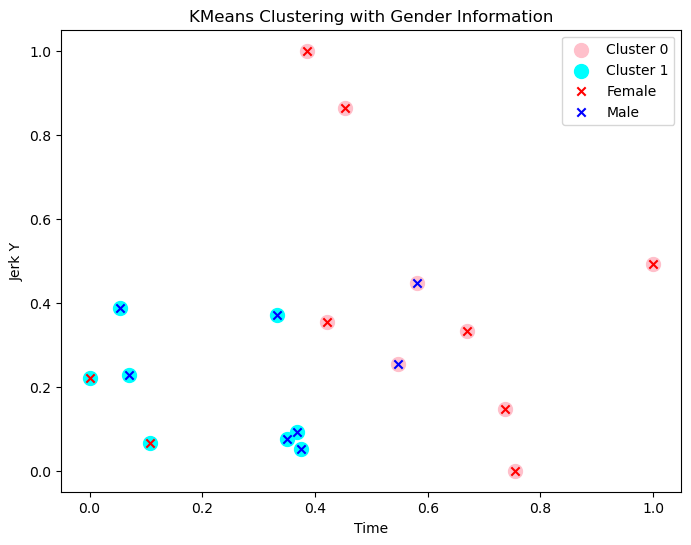

In [141]:
plotGender2Clusters(time_jerk_y_data, 'Time', 'Jerk Y')

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


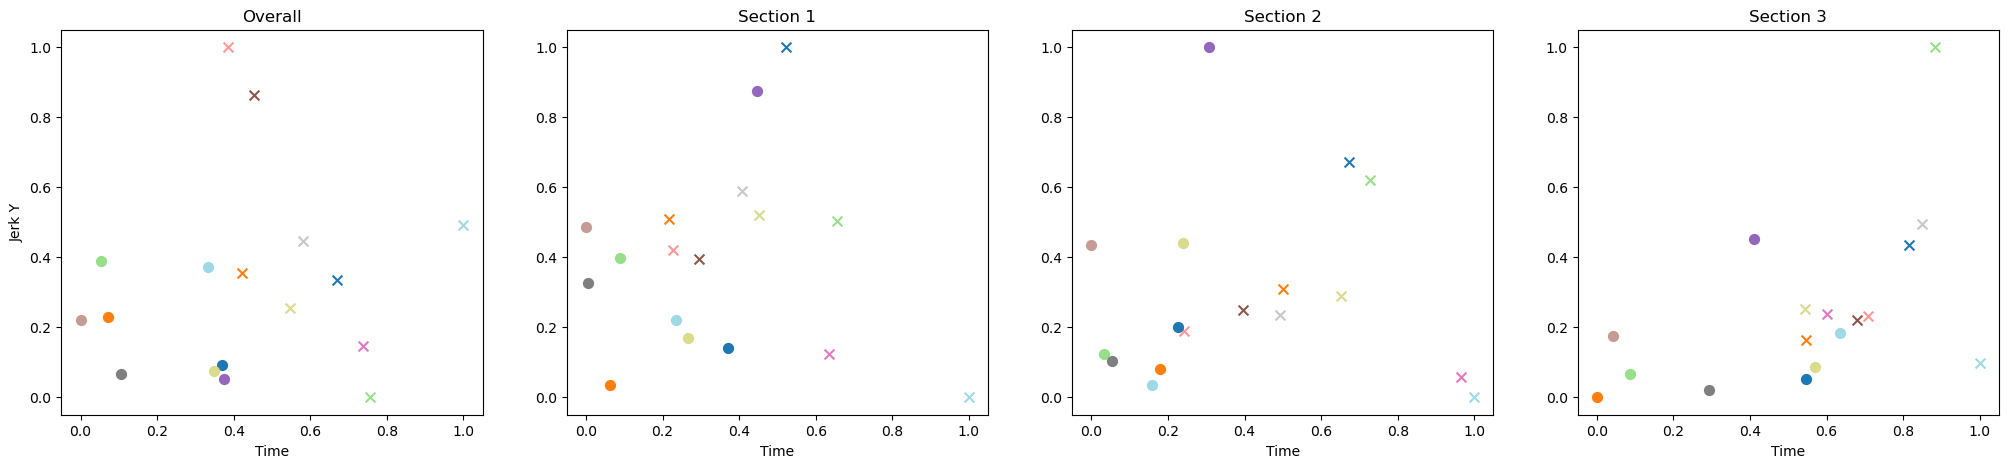

In [144]:
plotSections2Cluster(time_jerk_y_data, time_jerk_y_data_1, time_jerk_y_data_2, time_jerk_y_data_3, 'Time', 'Jerk Y')

# Time and Peaks

In [125]:
time_peaks_data = np.array([[t, j] for t, j in zip(time, peaks)])
time_peaks_data_1 = np.array([[t, j] for t, j in zip(time_1, peaks_1)])
time_peaks_data_2 = np.array([[t, j] for t, j in zip(time_2, peaks_2)])
time_peaks_data_3 = np.array([[t, j] for t, j in zip(time_3, peaks_3)])

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: 5 females, 2 males
Cluster 1: 4 females, 6 males


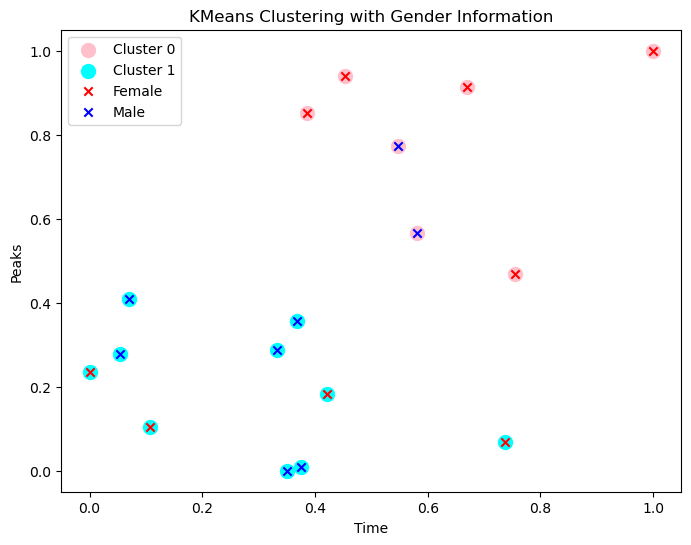

In [142]:
plotGender2Clusters(time_peaks_data, 'Time', 'Peaks')

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


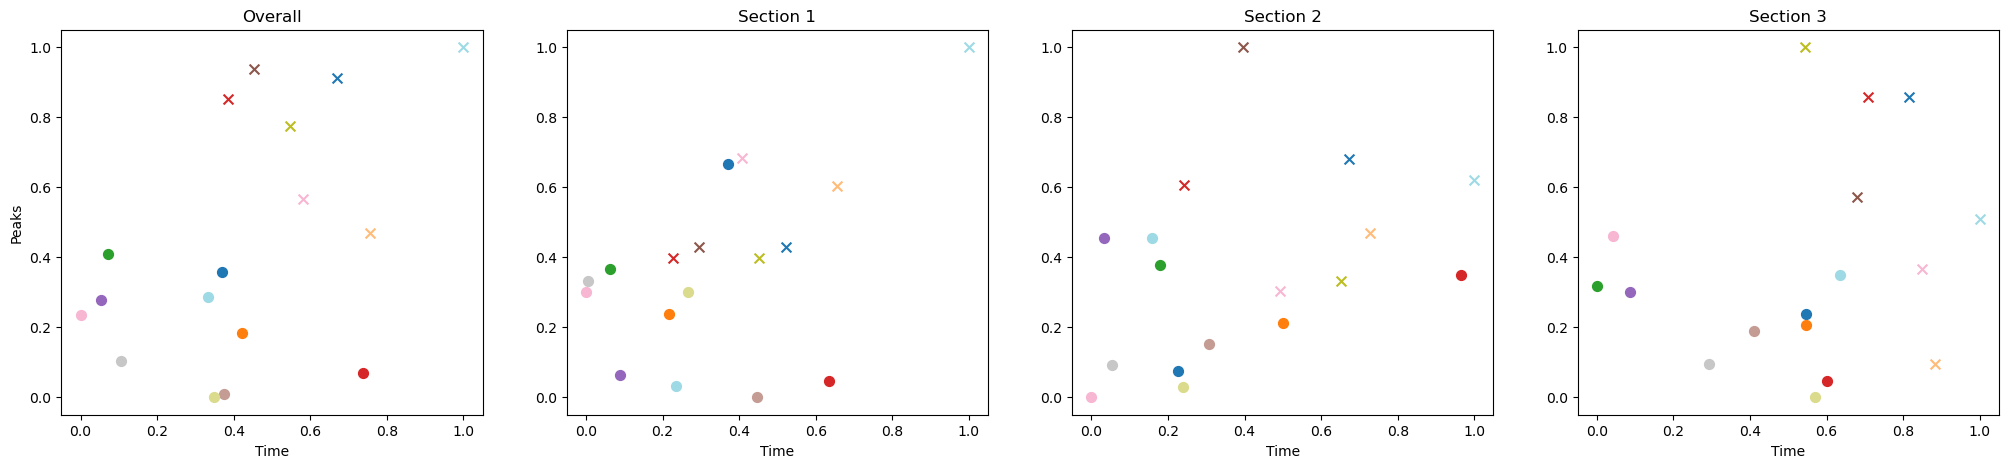

In [145]:
plotSections2Cluster(time_peaks_data, time_peaks_data_1, time_peaks_data_2, time_peaks_data_3, 'Time', 'Peaks')